# Implementación de Sistemas dinámicos con ODE

### Esta implementación es fundamental para comprender las activaaciones nuronal, que a diferencia de los modelos simples de SDE como  Integrate-and-Fire  y FitzHugh–Nagumo. Donde el autor Steven H. Strogatz del libro "Nonlinear Dynamics and Chaos" realiza un abordaje entendible en el capítulo

### La ecuación logística está dada por:

\begin{eqnarray*}
x_{n+1} &=& r \cdot x_{n} \cdot \big( 1-x_{n}\big)
\end{eqnarray*}

### Donde:

*  $\mathbf{x_{n}}:$ Es una medida adimencional de la enésima generación
*  $\mathbf{r}:$ Es la taza de crecimiento o carga del sistema poblacional

### Tratando este caso más general con un método numerico más particular. (RK4, TSI5, ...., etc). Se llega a la conclusión que las $\mathbf{r_{n}}$ describen una serie geométrica que está dada por:
\begin{eqnarray*}
\delta = \lim_{x\rightarrow\infty}\frac{r_{n} - r_{n-1} }{r_{n+1}- r_{n}}
\end{eqnarray*}
### Donde $\delta$ es el factor de convergencia de la serie.

### Esto tiene como fundamento el análisis del sistema dinámico donde se podría suponer que a medida que $r$ sea grande, el sistema se vuelve caótico. El sistema que describe el comportamiento de activación neuronal es escencialmente un atractor al rededor de $r$, tratándolo en forma temporal (Análisis de Series Temporales) 



# Implementación en Julia del sistema Dinámico

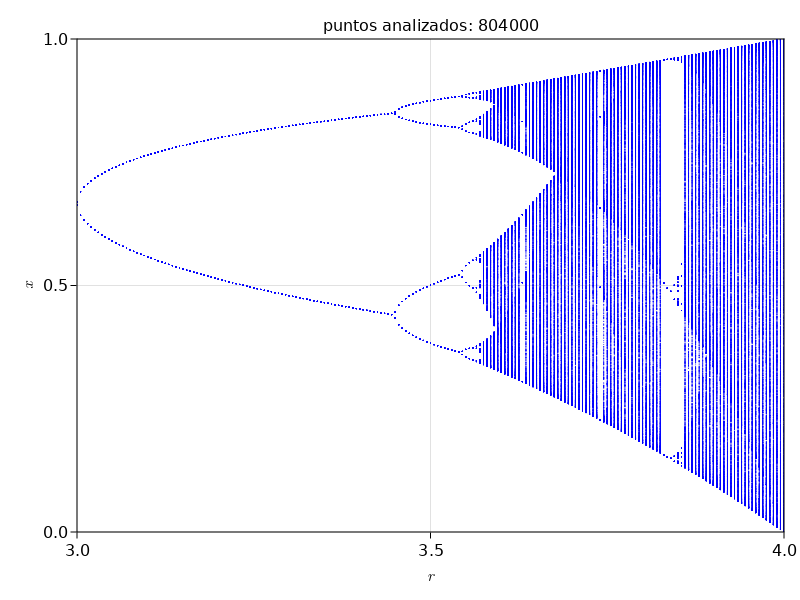

In [5]:
using DynamicalSystems, CairoMakie # Librerías que analizan el sistema dinámico

LOG = Systems.logistic() #Definición de la ecuación logística en forma funcional (sistema)
i = 1                   #Comienzo del Ciclo 
evaluados = 3:0.005:4   # Intervalo analizado y paso del método numérico 
T = [rand() for m in 1:10]  #Períodos de análisis de r_{n}
n = 4000
Ttr = 4000
indice = 1           #Comienzo del Proceso iterativo de la ecuación logística



salida = orbitdiagram(LOG, i, indice, evaluados; n = n, Ttr = Ttr)

L = length(evaluados)
u = Vector{Float64}(undef, n*L)
v = copy(u)
for j in 1:L
    u[(1 + (j-1)*n):j*n] .= evaluados[j]
    v[(1 + (j-1)*n):j*n] .= salida[j]
end

fig, ax = scatter(u, v; axis = (xlabel = L"r",  ylabel = L"x"),
    markersize = 1, color = ("blue", 0.9),
)
ax.title = "puntos analizados: $(L*n)"
xlims!(ax, evaluados[1], evaluados[end]); ylims!(ax,0,1)
fig